In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate,accuracy

In [3]:
path = untar_data(URLs.CALTECH_101)

In [4]:
path = Config.data_path()/'101_ObjectCategories'

In [5]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/pigeon'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/lamp'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/crocodile'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/pagoda'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/mandolin'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/ibis'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/barrel'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/mayfly'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/rooster'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/octopus'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/ant'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/elephant'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/windsor_chair'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/saxophone'),
 PosixPa

In [7]:
np.random.seed(2)

Use all the data as training with valid_pact

In [8]:
data = ImageDataBunch.from_folder(path,train='.',ds_tfms=get_transforms(),size=26,valid_pct=0.2).normalize(imagenet_stats)

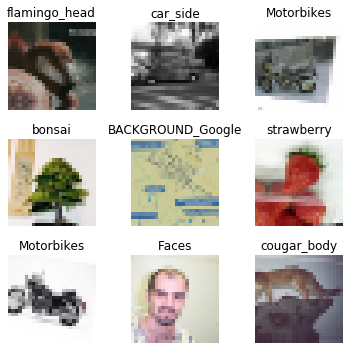

In [9]:
data.show_batch(rows=3,figsize=(5,5))

In [10]:
data.c

102

In [11]:
learn = cnn_learner(data,models.resnet50,metrics=accuracy)
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,4.155524,3.066006,0.356674,00:15
1,3.352698,2.675470,0.405908,00:13


In [12]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,3.056933,2.597389,0.415208,00:13
1,2.994745,2.452901,0.442013,00:13
2,2.724442,2.258565,0.473195,00:13
3,2.435910,2.115584,0.495077,00:13
4,2.285724,2.078333,0.504376,00:13


In [13]:
learn.save('stage-1')

## Results

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

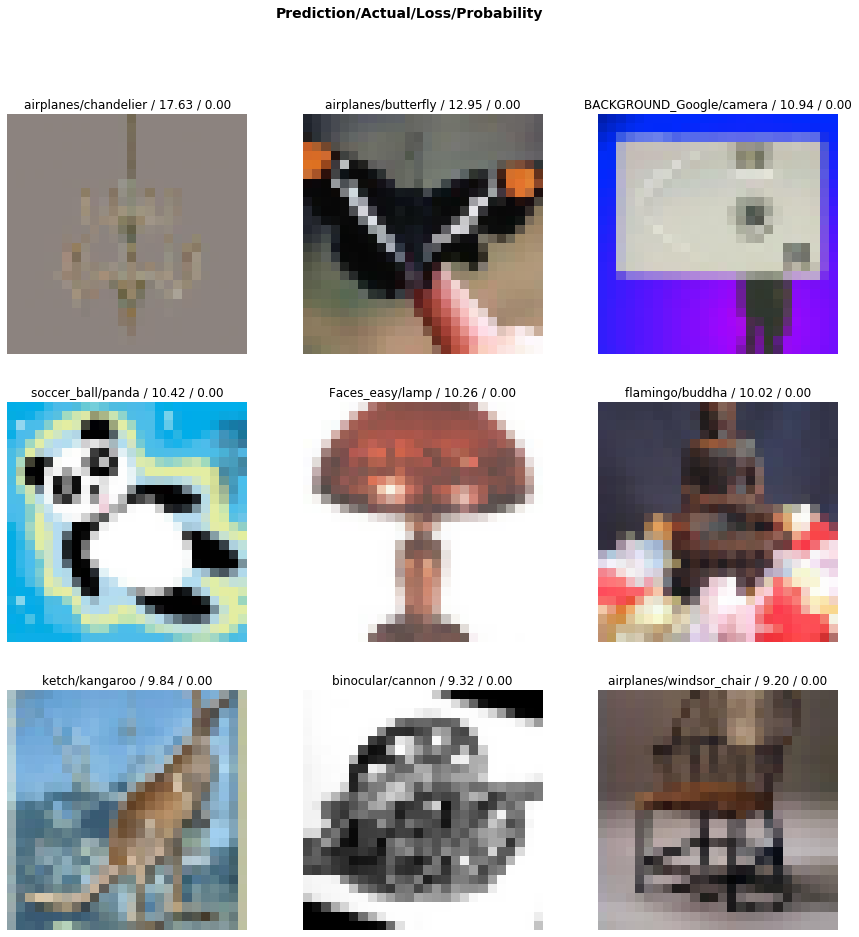

In [15]:
interp.plot_top_losses(9,figsize=(15,15))

In [16]:
learn.unfreeze()

In [17]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


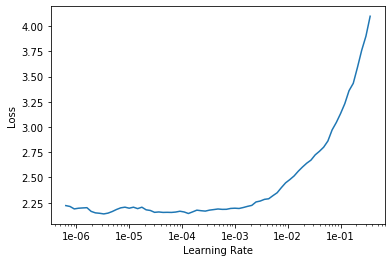

In [18]:
learn.recorder.plot()

In [19]:
learn.unfreeze()
learn.fit_one_cycle(10,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,2.218432,2.073522,0.508206,00:13
1,2.177794,2.030562,0.510941,00:13
2,2.123414,1.981562,0.525164,00:13
3,2.047964,1.925667,0.535558,00:13
4,1.985034,1.875981,0.545405,00:13
5,1.921248,1.844278,0.548140,00:13
6,1.900652,1.821760,0.554158,00:13
7,1.838960,1.815732,0.551969,00:13
8,1.838891,1.798389,0.554158,00:13
9,1.796384,1.800393,0.553611,00:13


In [20]:
learn.save('stage-2')

In [22]:
data = ImageDataBunch.from_folder(path,train='.',ds_tfms=get_transforms(),size=26,valid_pct=0.2,bs=16).normalize(imagenet_stats)

In [23]:
learn = cnn_learner(data,models.resnet152,metrics=accuracy)
learn.fit_one_cycle(5)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /home/jupyter/.cache/torch/checkpoints/resnet152-b121ed2d.pth


epoch,train_loss,valid_loss,accuracy,time
0,4.255170,26.608032,0.273523,00:46
1,3.543215,13.233766,0.323304,00:46
2,2.998417,10.937462,0.391685,00:46
3,2.713185,3.932423,0.432166,00:46
4,2.630218,6.017027,0.429978,00:46


In [24]:
learn.save('stage-1-res152')